In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D,GlobalAveragePooling2D,Input
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\SOWMYA\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\SOWMYA\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\SOWMYA\AppData\Local\Temp\ipykernel_24388\2051143547.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import

In [1]:
import os

In [4]:
import yaml

with open(r"GARBAGE DATASET\GARBAGE CLASSIFICATION 3.v2-gc1.yolov5pytorch\data.yaml", "r") as stream:
    try:
        print(yaml.safe_load(stream))
    except yaml.YAMLError as exc:
        print(exc)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 6, 'names': ['BIODEGRADABLE', 'CARDBOARD', 'GLASS', 'METAL', 'PAPER', 'PLASTIC'], 'roboflow': {'workspace': 'material-identification', 'project': 'garbage-classification-3', 'version': 2, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/material-identification/garbage-classification-3/dataset/2'}}


In [2]:
data_dir = r"GARBAGE DATASET\GARBAGE CLASSIFICATION 3.v2-gc1.yolov5pytorch\test"
oil=[]
for file in os.listdir(data_dir):
    oil+=[file]
print(oil)
print(len(oil))

['images', 'labels']
2


In [3]:
img_height,img_width=256,256
batch_size=20

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(r"GARBAGE DATASET\GARBAGE CLASSIFICATION 3.v2-gc1.yolov5pytorch\train",
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(r"GARBAGE DATASET\GARBAGE CLASSIFICATION 3.v2-gc1.yolov5pytorch\test",
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                )

Found 1201 images belonging to 5 classes.
Found 303 images belonging to 5 classes.


In [4]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2)) 
model1.add(Dense(6, activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [6]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
hist=model1.fit(train_generator,epochs=25,validation_data=test_generator)

Epoch 1/5
61/61 [==============================] - 185s 3s/step - loss: 1.5039 - accuracy: 0.4521 - val_loss: 2.7023 - val_accuracy: 0.3333
Epoch 2/5
61/61 [==============================] - 160s 3s/step - loss: 0.7587 - accuracy: 0.7261 - val_loss: 3.1058 - val_accuracy: 0.4059
Epoch 3/5
61/61 [==============================] - 161s 3s/step - loss: 0.4091 - accuracy: 0.8576 - val_loss: 2.7169 - val_accuracy: 0.4257
Epoch 4/5
61/61 [==============================] - 171s 3s/step - loss: 0.2709 - accuracy: 0.9126 - val_loss: 2.0661 - val_accuracy: 0.5017
Epoch 5/5
61/61 [==============================] - 191s 3s/step - loss: 0.2369 - accuracy: 0.9284 - val_loss: 3.4901 - val_accuracy: 0.4587


In [7]:
model1.save("models/newMobilenet.h5")


C:\Users\0585\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
file=open(r"plain.txt","r")
Lines=file.readlines()
count=0
accuracy=[]
for i in Lines:
    count+=1
    accuracy.append([float(x) for x in i.split(",")])
print(accuracy)

[[0.5400763154029846, 0.8339694738388062, 0.927480936050415, 0.9389312863349915, 0.9561068415641785, 0.9580152630805969, 0.982824444770813, 0.9713740348815918, 0.9503816962242126, 0.9408397078514099, 0.9522900581359863, 0.9637404680252075, 0.927480936050415, 0.9141221642494202, 0.9637404680252075, 0.9770992398262024, 0.9770992398262024, 0.9942747950553894, 0.9942747950553894, 0.9618320465087891, 0.8664122223854065, 0.919847309589386, 0.9389312863349915, 0.9103053212165833, 0.9217557311058044], [0.24092409014701843, 0.14191418886184692, 0.22772277891635895, 0.33003300428390503, 0.3696369528770447, 0.4686468541622162, 0.39603960514068604, 0.4554455578327179, 0.264026403427124, 0.2574257552623749, 0.27062705159187317, 0.3465346395969391, 0.3465346395969391, 0.3366336524486542, 0.39273926615715027, 0.42574256658554077, 0.36303630471229553, 0.38283827900886536, 0.3993399441242218, 0.25082507729530334, 0.30693069100379944, 0.3663366436958313, 0.3663366436958313, 0.3564356565475464, 0.3300330

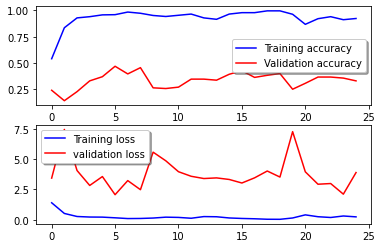

In [5]:

fig, ax = plt.subplots(2,1)
ax[0].plot(accuracy[0], color='b', label="Training accuracy")

ax[0].plot(accuracy[1], color='r',label="Validation accuracy")

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(accuracy[2], color='b', label="Training loss")

ax[1].plot(accuracy[3], color='r', label="validation loss")

legend = ax[1].legend(loc='best', shadow=True)

In [6]:
print(accuracy[-2])

[0.9179389476776123]


In [7]:
print(accuracy[-1])

[0.21782177686691284]
